# Missing Data Analysis

Visualize missing data patterns across all cleaned datasets

In [1]:
library(tidyverse)
library(naniar)
library(visdat)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.1     v stringr   1.6.0
v ggplot2   4.0.0     v tibble    3.3.0
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.1.0     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Load Data

In [2]:
# load all cleaned datasets
billboard <- read_csv('../../data/cleaned/billboard_24years_lyrics_spotify_bigquery.csv')
artists <- read_csv('../../data/cleaned/musicoset_artists_cleaned.csv')
songs <- read_csv('../../data/cleaned/musicoset_songs_cleaned.csv')

sprintf("Billboard: %d rows", nrow(billboard))
sprintf("Artists: %d rows", nrow(artists))
sprintf("Songs: %d rows", nrow(songs))

Rows: 3397 Columns: 26
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (11): song, band_singer, songurl, titletext, url, lyrics, uri, type, id,...
dbl (15): ranking, year, danceability, energy, key, loudness, mode, speechin...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 11518 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (6): artist_id, name, artist_type, main_genre, genres, image_url
dbl (2): followers, popularity

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 20405 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (5): song_id, song_name, billboard, artists, song_type
dbl (1): popul

[1] "Billboard: 3397 rows"

[1] "Artists: 11518 rows"

[1] "Songs: 20405 rows"

## Billboard Dataset

In [3]:
# missing data summary
miss_var_summary(billboard)

variable,n_miss,pct_miss
<chr>,<int>,<num>
danceability,2911,85.7
energy,2911,85.7
key,2911,85.7
loudness,2911,85.7
mode,2911,85.7
speechiness,2911,85.7
acousticness,2911,85.7
instrumentalness,2911,85.7
liveness,2911,85.7


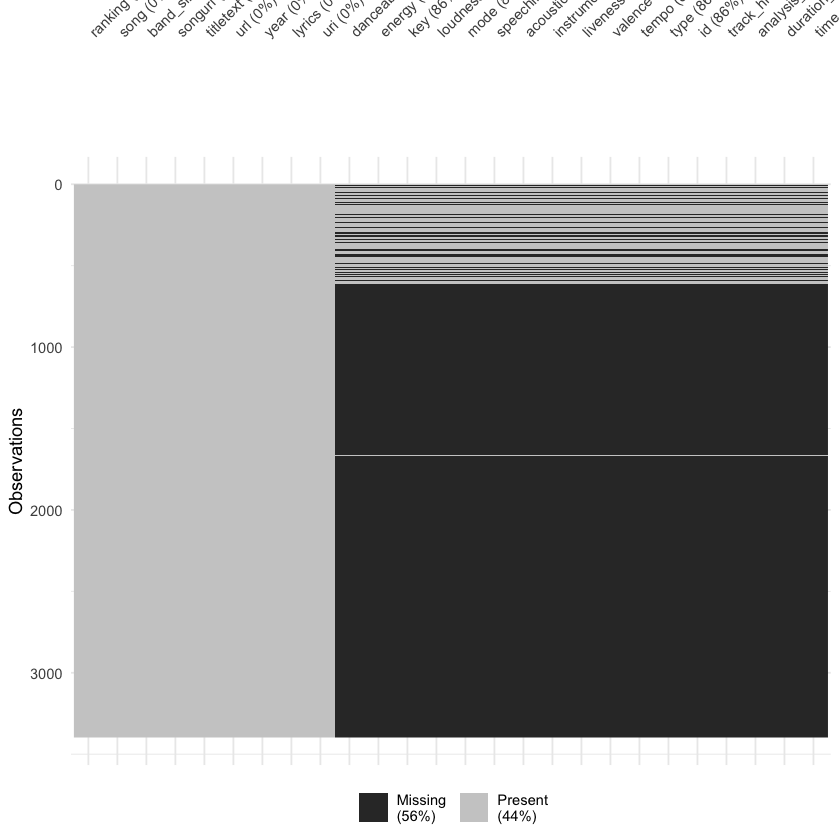

In [4]:
# visualize missing data
vis_miss(billboard)

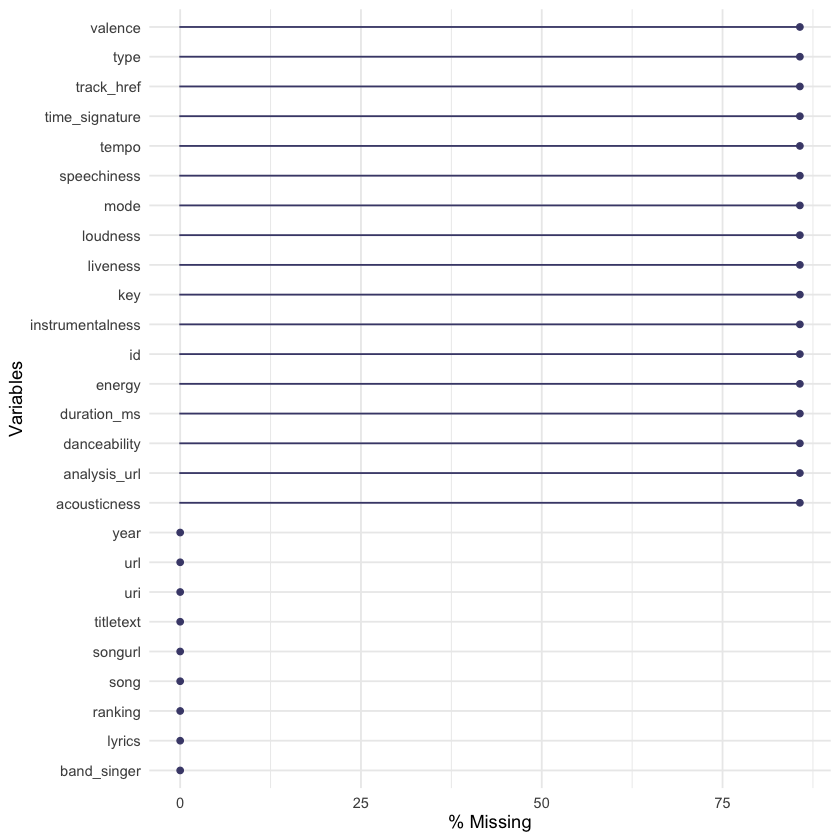

In [5]:
# missing data bar chart
gg_miss_var(billboard, show_pct=TRUE)

In [6]:
# spotify features only
spotify_cols <- c('danceability', 'energy', 'key', 'loudness', 'mode', 
                  'speechiness', 'acousticness', 'instrumentalness', 
                  'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature')

billboard %>% 
  select(all_of(spotify_cols)) %>%
  miss_var_summary()

variable,n_miss,pct_miss
<chr>,<int>,<num>
danceability,2911,85.7
energy,2911,85.7
key,2911,85.7
loudness,2911,85.7
mode,2911,85.7
speechiness,2911,85.7
acousticness,2911,85.7
instrumentalness,2911,85.7
liveness,2911,85.7


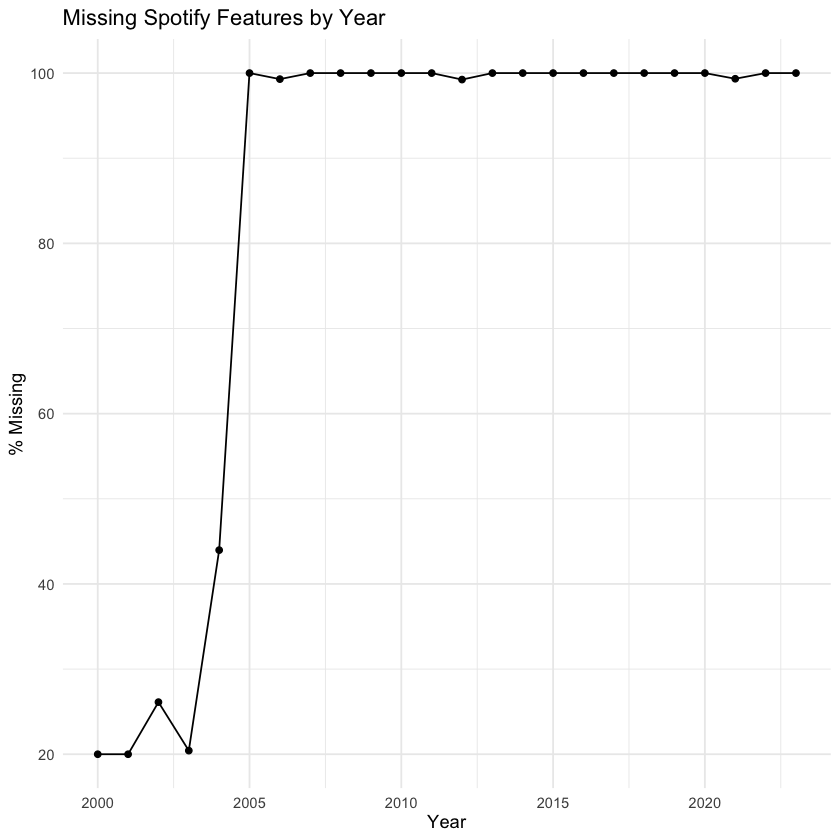

In [7]:
# missing data by year
billboard %>%
  group_by(year) %>%
  miss_var_summary() %>%
  filter(variable == 'danceability') %>%
  ggplot(aes(year, pct_miss)) +
  geom_line() +
  geom_point() +
  labs(title='Missing Spotify Features by Year', 
       y='% Missing', x='Year') +
  theme_minimal()

## MusicoSet Artists

In [8]:
# missing summary
miss_var_summary(artists)

variable,n_miss,pct_miss
<chr>,<int>,<num>
artist_type,4466,38.8
main_genre,3148,27.3
genres,3148,27.3
image_url,504,4.38
followers,2,0.017[4m4[24m
artist_id,0,0
name,0,0
popularity,0,0


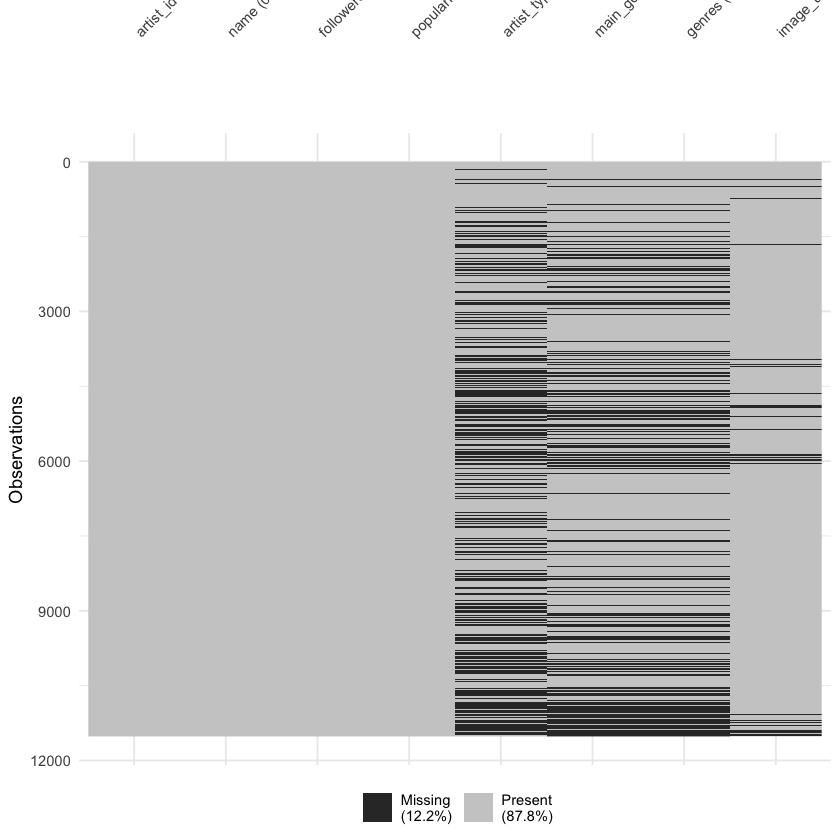

In [9]:
# visualize
vis_miss(artists)

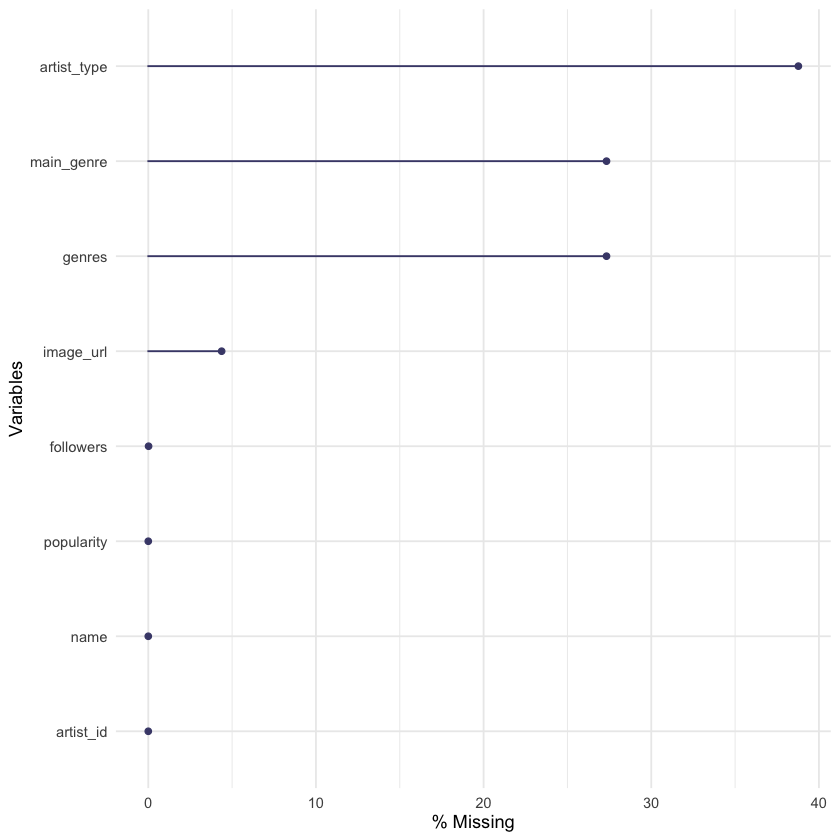

In [10]:
# bar chart
gg_miss_var(artists, show_pct=TRUE)

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
i Please use tidy evaluation idioms with `aes()`.
i See also `vignette("ggplot2-in-packages")` for more information.
i The deprecated feature was likely used in the UpSetR package.
  Please report the issue to the authors."
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead.
i The deprecated feature was likely used in the UpSetR package.
  Please report the issue to the authors."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead.
i The deprecated feature was likely used in the UpSetR package.
  Please report the issue to the authors."


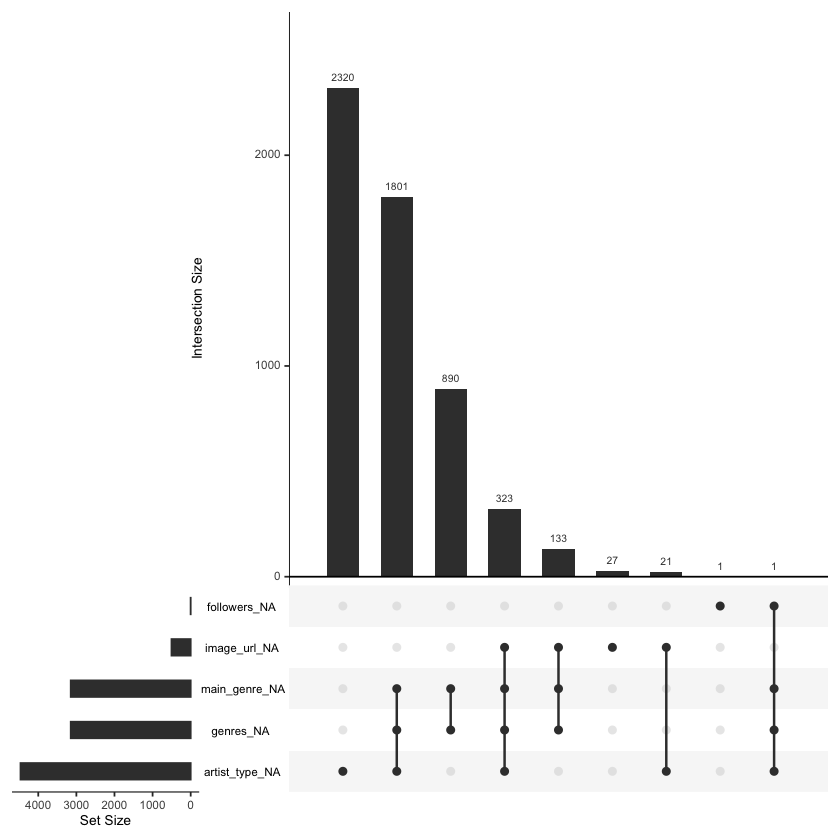

In [11]:
# missing patterns - which combos occur together?
gg_miss_upset(artists)

## MusicoSet Songs

In [12]:
# missing summary
miss_var_summary(songs)

variable,n_miss,pct_miss
<chr>,<int>,<num>
song_id,0,0
song_name,0,0
billboard,0,0
artists,0,0
popularity,0,0
explicit,0,0
song_type,0,0


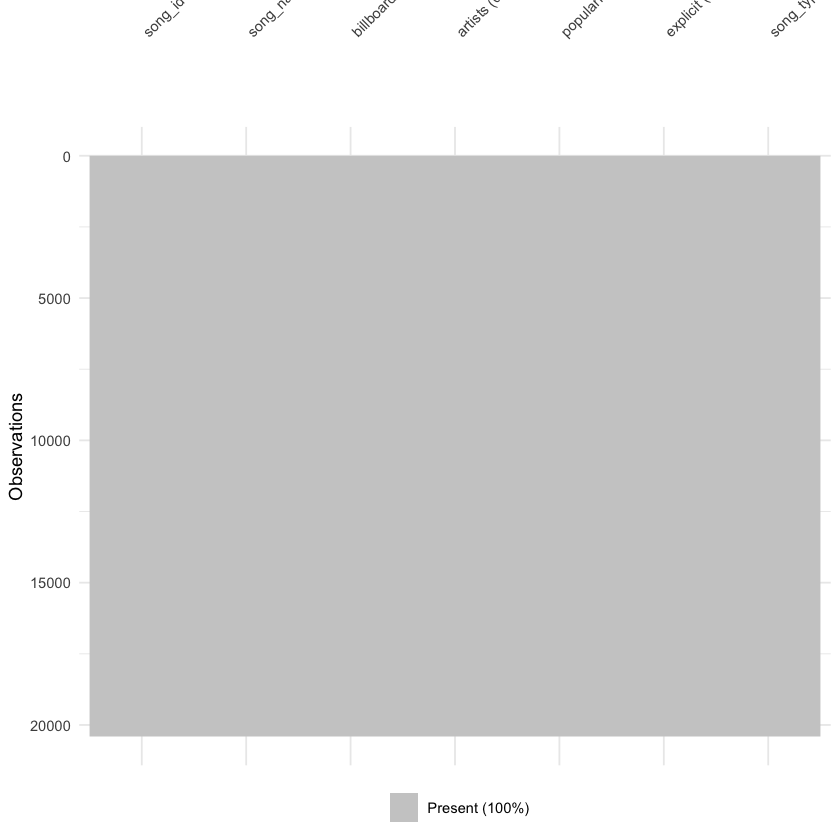

In [13]:
# visualize
vis_miss(songs)

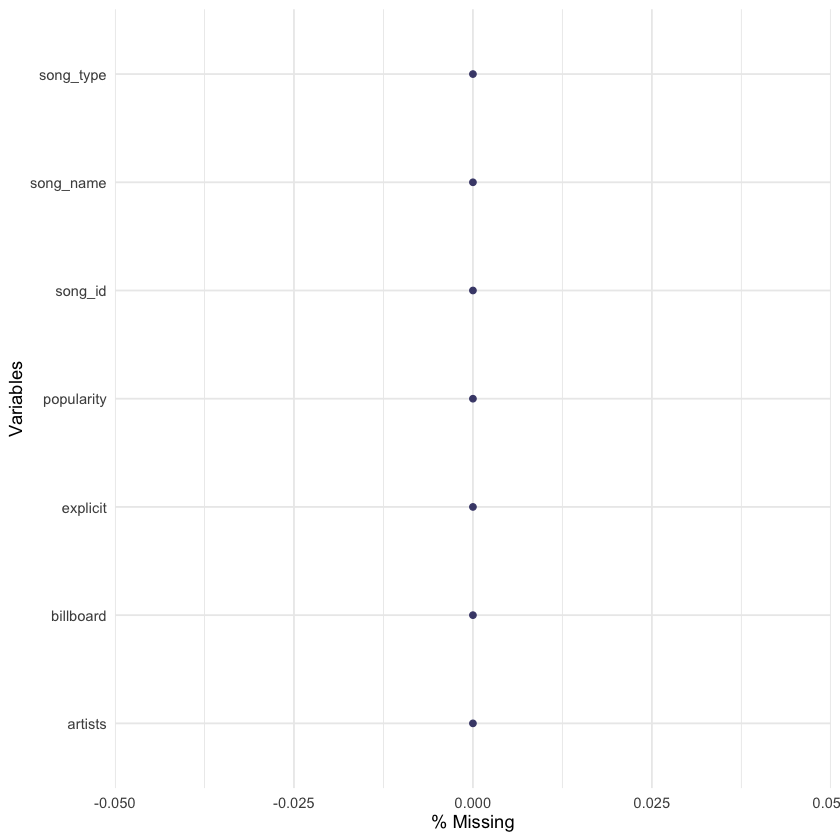

In [14]:
# bar chart
gg_miss_var(songs, show_pct=TRUE)

## Summary Comparison

In [15]:
# overall missing percentages
tibble(
  dataset = c('Billboard', 'Artists', 'Songs'),
  total_cells = c(nrow(billboard) * ncol(billboard),
                  nrow(artists) * ncol(artists),
                  nrow(songs) * ncol(songs)),
  missing_cells = c(sum(is.na(billboard)),
                    sum(is.na(artists)),
                    sum(is.na(songs))),
  pct_missing = round(missing_cells / total_cells * 100, 2)
)

dataset,total_cells,missing_cells,pct_missing
<chr>,<int>,<int>,<dbl>
Billboard,88322,49487,56.03
Artists,92144,11268,12.23
Songs,142835,0,0.00


In [16]:
# top 10 columns with most missing data across all datasets
bind_rows(
  miss_var_summary(billboard) %>% mutate(dataset = 'Billboard'),
  miss_var_summary(artists) %>% mutate(dataset = 'Artists'),
  miss_var_summary(songs) %>% mutate(dataset = 'Songs')
) %>%
  arrange(desc(pct_miss)) %>%
  head(10)

variable,n_miss,pct_miss,dataset
<chr>,<int>,<num>,<chr>
danceability,2911,85.7,Billboard
energy,2911,85.7,Billboard
key,2911,85.7,Billboard
loudness,2911,85.7,Billboard
mode,2911,85.7,Billboard
speechiness,2911,85.7,Billboard
acousticness,2911,85.7,Billboard
instrumentalness,2911,85.7,Billboard
liveness,2911,85.7,Billboard
